# MNIST Data Set - Basic Approach

View first the follow video: https://www.youtube.com/watch?v=aircAruvnKk

### Get the MNIST Data

Importing TensorFlow as tf as a standard

In [1]:
import tensorflow as tf

Import a helper function from the tensorflow.examples.tutorials.mnist called input_data to helps us load our data.

We’re going to be using the MNIST data set which consists of data showing images of different handwritten digits which are numbers from 0 through 9. 

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

what this does is it says download the data, save it to the MNIST_data folder, and process it so that data is in one hot encoded format.

One hot encoded format: https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f

In [3]:
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


** Alternative sources of the data just in case: **

* http://yann.lecun.com/exdb/mnist/
* https://github.com/mrgloom/MNIST-dataset-in-different-formats

In [4]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [5]:
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [6]:
mnist.train.images.shape

(55000, 784)

In [7]:
mnist.test.images.shape

(10000, 784)

One-hot encoded!

In [8]:
mnist.train.labels[1]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [9]:
mnist.train.num_examples

55000

In [10]:
mnist.test.num_examples

10000

### Visualizing the Data

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
mnist.train.images[1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [13]:
mnist.train.images[1].shape

(784,)

In [14]:
mnist.train.images[1].reshape(28,28)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

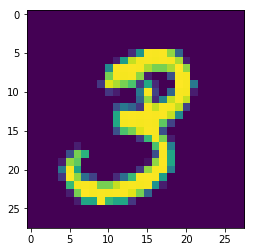

In [15]:
plt.imshow(mnist.train.images[1].reshape(28,28))

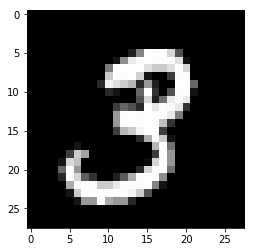

In [16]:
plt.imshow(mnist.train.images[1].reshape(28,28),cmap='gist_gray')

In [17]:
mnist.train.images[1].max()

1.0

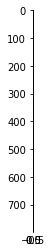

In [18]:
plt.imshow(mnist.train.images[1].reshape(784,1))

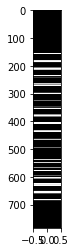

In [19]:
plt.imshow(mnist.train.images[1].reshape(784,1),cmap='gist_gray',aspect=0.01)

## Create the Model

Placeholder - training data that you are passing into the model.

float32 data type with shape [None,784] - None defines the batch size - number of images per batch to send to model, 784 columns representing the 784 pixels of each image

In [20]:
x = tf.placeholder(tf.float32,shape=[None,784])
x

<tf.Tensor 'Placeholder:0' shape=(?, 784) dtype=float32>

W defines the Weights of the model for each output class.

Init W with matrix of zeros - 784 pixels : 10 classes

In [21]:
# 10 because 0-9 possible numbers
W = tf.Variable(tf.zeros([784,10]))
W

Instructions for updating:
Colocations handled automatically by placer.


<tf.Variable 'Variable:0' shape=(784, 10) dtype=float32_ref>

b defines the biases of the model for each output class.

Init b with array of zeros - 1 per class

In [22]:
b = tf.Variable(tf.zeros([10]))
b

<tf.Variable 'Variable_1:0' shape=(10,) dtype=float32_ref>

Define y by defining ANN function. matmul defines the matrix multiplication between x and Weights.

In this case, y defines the y_predicted by the model.

In [23]:
# Create the Graph
y = tf.matmul(x,W) + b
y

<tf.Tensor 'add:0' shape=(?, 10) dtype=float32>

## Loss and Optimizer

y_true represents the real value of y

In [24]:
y_true = tf.placeholder(tf.float32,[None,10])

# Cross Entropy

reduce_mean represents the tf function to reduce the error between the y_true and y. Cross_entropy defines how to calculate the error.

In [25]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_true, logits=y))

Higher Learning Rate represents a faster learning speed, but provides less accurate results.
optimizer defines the method to reduce the error.

In [26]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)

train: grab the optimizer method and minimize that particular error.

In [27]:
train = optimizer.minimize(cross_entropy)

## Create Session

Initializes all the variables into the tf session

In [28]:
init = tf.global_variables_initializer()

In [30]:
with tf.Session() as sess:
    sess.run(init)
    
    # Train the model for 1000 steps on the training set
    # Using built in batch feeder from mnist for convenience
    
    for step in range(1000):
        
        # Grab 100 images for the batch and save in batch_x (features) and batch_y (class)
        batch_x , batch_y = mnist.train.next_batch(100)
        
        # Place the batch_x and batch_y into the placeholders defined above
        sess.run(train,feed_dict={x:batch_x,y_true:batch_y})
        
    # Test the Train Model
    # Request where both values are equal to each other between y and y_true
    matches = tf.equal(tf.argmax(y,1),tf.argmax(y_true,1))
    
    # Calculate accuracy
    acc = tf.reduce_mean(tf.cast(matches,tf.float32))
    
    print(sess.run(acc,feed_dict={x:mnist.test.images,y_true:mnist.test.labels}))

0.9196
